# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [557]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Load the Data

In [514]:
df=pd.read_csv("/content/Traffic_Accidents.csv")
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [515]:
df.shape

(52000, 30)

In [516]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [517]:
# although its a high number but compared to the amount of data it's relativly low and we can encode it
len(df["Date"].unique())

366

In [518]:
# although its a high number but compared to the amount of data it's relativly low and we can encode it
len(df["Time"].unique())

1421

In [519]:
#cannot be one hot encoded
len(df["Accident_Index"].unique())

38979

In [520]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [521]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


In [522]:
df.duplicated().sum()

0

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [523]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols=num_cols.delete(-1)

In [524]:
cat_cols=df.select_dtypes(include=object).columns
cat_cols

Index(['Accident_Index', 'Date', 'Time', 'Local_Authority_(Highway)',
       'Road_Type', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [525]:
nona=df.dropna()
df.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [526]:
(np.abs(stats.zscore(df[num_cols]))<3).sum()

,0
Unnamed: 0,52000
Location_Easting_OSGR,52000
Location_Northing_OSGR,52000
Longitude,52000
Latitude,52000
Police_Force,51834
Accident_Severity,51370
Number_of_Vehicles,0
Number_of_Casualties,50610
Day_of_Week,0


In [527]:
no_out=nona[(np.abs(stats.zscore(nona[num_cols]))<3)]
nona[num_cols]=no_out[num_cols]
#the na ones are Outliers
nona.isna().sum()

<ipython-input-527-f44c5be4fc91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nona[num_cols]=no_out[num_cols]


,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,151
Accident_Severity,598
Number_of_Vehicles,1074
Number_of_Casualties,1339


In [528]:
nona.dropna()
nona.describe()
df[cat_cols]=df[cat_cols].fillna(nona[cat_cols].mode())
df[num_cols]=df[num_cols].fillna(nona[num_cols].mean())
df=df.dropna()

In [529]:
df[cat_cols]

,Accident_Index,Date,Time,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2.01E+12,24/04/2005,16:39,E10000028,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,E01029654
1,200520D303703,08/10/2005,14:25,E08000025,Slip road,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,E01009313
2,200501TX20137,02/04/2005,10:20,E09000018,Dual carriageway,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,Yes,E01002678
3,200520E097001,26/05/2005,21:30,E08000025,Dual carriageway,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,No,E01008924
4,2.01E+12,11/01/2005,00:50,E10000028,Dual carriageway,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,Yes,E01029416
...,...,...,...,...,...,...,...,...,...,...,...,...
51995,200511DJ27240,10/11/2005,11:40,E06000005,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,Yes,E01012363
51996,20053102C2156,17/08/2005,09:05,E06000018,Single carriageway,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,Yes,E01028141
51997,200501BS70452,22/08/2005,10:25,E09000020,Single carriageway,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,Yes,E01002840
51998,2.01E+12,18/12/2005,17:40,E10000023,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,Yes,E01027681


In [530]:
#nominal_cols=["Road_Type","Pedestrian_Crossing-Human_Control","Pedestrian_Crossing-Physical_Facilities","Light_Conditions","Weather_Conditions","Road_Surface_Conditions"]
scaler=StandardScaler()
onehot=OneHotEncoder()
ordinal=OrdinalEncoder()

In [531]:
df[cat_cols]=ordinal.fit_transform(df[cat_cols])
df[num_cols]=scaler.fit_transform(df[num_cols])
pca=PCA(2)
pca_df=pca.fit_transform(df)
df

<ipython-input-531-15dfced31ff4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols]=ordinal.fit_transform(df[cat_cols])
<ipython-input-531-15dfced31ff4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols]=scaler.fit_transform(df[num_cols])


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,1.185965,1.0,-0.866066,-0.346748,-0.864253,-0.340288,1.035892,0.387597,0.225079,0.798129,...,-0.282790,2.0,2.0,4.0,1.0,0.0,1.733564,1.0,14152.0,2005.0
1,0.861576,28731.0,-0.391653,-0.467402,-0.385985,-0.460302,0.931213,-2.170967,-1.198632,-0.445885,...,-0.282790,2.0,2.0,4.0,1.0,0.0,-0.576846,1.0,7144.0,2005.0
2,-1.081786,9755.0,1.148839,-1.395382,1.126815,-1.395744,-1.057672,0.387597,0.225079,0.798129,...,0.093873,2.0,3.0,4.0,1.0,0.0,-0.576846,1.0,2011.0,2005.0
3,0.891793,29181.0,-0.571432,-0.485811,-0.566938,-0.478478,0.931213,0.387597,0.225079,-0.445885,...,-0.282790,2.0,2.0,2.0,1.0,0.0,-0.576846,0.0,6840.0,2005.0
4,1.214894,1.0,-0.268102,-0.156779,-0.259220,-0.151244,1.035892,0.387597,-1.198632,-0.445885,...,-0.282790,2.0,2.0,2.0,1.0,0.0,1.733564,1.0,13958.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.208968,23883.0,-0.175888,1.529090,-0.147808,1.526922,-0.010890,0.387597,0.225079,-0.445885,...,-0.237159,2.0,2.0,4.0,1.0,0.0,-0.576846,1.0,9431.0,2005.0
51996,1.621808,37202.0,0.166127,0.010287,0.184099,0.013241,2.082673,0.387597,-1.198632,-0.445885,...,4.696798,2.0,3.0,4.0,1.0,0.0,-0.576846,1.0,13545.0,2005.0
51997,-1.713755,205.0,1.303578,-1.393913,1.279192,-1.396401,-1.057672,0.387597,-1.198632,-0.445885,...,-0.282790,2.0,4.0,4.0,5.0,5.0,-0.576846,1.0,2140.0,2005.0
51998,0.297900,1.0,-0.192532,1.079318,-0.170166,1.079237,0.093788,0.387597,0.225079,0.798129,...,-0.282790,2.0,2.0,0.0,1.0,0.0,1.733564,1.0,13185.0,2005.0


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [532]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,1.185965,1.0,-0.866066,-0.346748,-0.864253,-0.340288,1.035892,0.387597,0.225079,0.798129,...,-0.282790,2.0,2.0,4.0,1.0,0.0,1.733564,1.0,14152.0,2005.0
1,0.861576,28731.0,-0.391653,-0.467402,-0.385985,-0.460302,0.931213,-2.170967,-1.198632,-0.445885,...,-0.282790,2.0,2.0,4.0,1.0,0.0,-0.576846,1.0,7144.0,2005.0
2,-1.081786,9755.0,1.148839,-1.395382,1.126815,-1.395744,-1.057672,0.387597,0.225079,0.798129,...,0.093873,2.0,3.0,4.0,1.0,0.0,-0.576846,1.0,2011.0,2005.0
3,0.891793,29181.0,-0.571432,-0.485811,-0.566938,-0.478478,0.931213,0.387597,0.225079,-0.445885,...,-0.282790,2.0,2.0,2.0,1.0,0.0,-0.576846,0.0,6840.0,2005.0
4,1.214894,1.0,-0.268102,-0.156779,-0.259220,-0.151244,1.035892,0.387597,-1.198632,-0.445885,...,-0.282790,2.0,2.0,2.0,1.0,0.0,1.733564,1.0,13958.0,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.208968,23883.0,-0.175888,1.529090,-0.147808,1.526922,-0.010890,0.387597,0.225079,-0.445885,...,-0.237159,2.0,2.0,4.0,1.0,0.0,-0.576846,1.0,9431.0,2005.0
51996,1.621808,37202.0,0.166127,0.010287,0.184099,0.013241,2.082673,0.387597,-1.198632,-0.445885,...,4.696798,2.0,3.0,4.0,1.0,0.0,-0.576846,1.0,13545.0,2005.0
51997,-1.713755,205.0,1.303578,-1.393913,1.279192,-1.396401,-1.057672,0.387597,-1.198632,-0.445885,...,-0.282790,2.0,4.0,4.0,5.0,5.0,-0.576846,1.0,2140.0,2005.0
51998,0.297900,1.0,-0.192532,1.079318,-0.170166,1.079237,0.093788,0.387597,0.225079,0.798129,...,-0.282790,2.0,2.0,0.0,1.0,0.0,1.733564,1.0,13185.0,2005.0


In [533]:
df[["2nd_Road_Number","1st_Road_Number"]].corr()

,2nd_Road_Number,1st_Road_Number
2nd_Road_Number,1.000000,0.116654
1st_Road_Number,0.116654,1.000000


In [534]:
df[["1st_Road_Number","1st_Road_Class"]].corr()

,1st_Road_Number,1st_Road_Class
1st_Road_Number,1.0000,-0.1966
1st_Road_Class,-0.1966,1.0000


In [535]:
#they do not change at all or thier value is uknown for us which reduce the explaneablty and make the model ambiguous
X=df.drop(["Year","Unnamed: 0","Police_Force"],axis=1)
X

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,1.0,-0.866066,-0.346748,-0.864253,-0.340288,0.387597,0.225079,0.798129,279.0,-1.621288,...,-1.254068,-0.282790,2.0,2.0,4.0,1.0,0.0,1.733564,1.0,14152.0
1,28731.0,-0.391653,-0.467402,-0.385985,-0.460302,-2.170967,-1.198632,-0.445885,93.0,1.496722,...,-1.254068,-0.282790,2.0,2.0,4.0,1.0,0.0,-0.576846,1.0,7144.0
2,9755.0,1.148839,-1.395382,1.126815,-1.395744,0.387597,0.225079,0.798129,15.0,1.496722,...,0.339206,0.093873,2.0,3.0,4.0,1.0,0.0,-0.576846,1.0,2011.0
3,29181.0,-0.571432,-0.485811,-0.566938,-0.478478,0.387597,0.225079,-0.445885,304.0,0.457386,...,-1.254068,-0.282790,2.0,2.0,2.0,1.0,0.0,-0.576846,0.0,6840.0
4,1.0,-0.268102,-0.156779,-0.259220,-0.151244,0.387597,-1.198632,-0.445885,120.0,-0.581951,...,-1.254068,-0.282790,2.0,2.0,2.0,1.0,0.0,1.733564,1.0,13958.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,23883.0,-0.175888,1.529090,-0.147808,1.526922,0.387597,0.225079,-0.445885,118.0,0.457386,...,0.657860,-0.237159,2.0,2.0,4.0,1.0,0.0,-0.576846,1.0,9431.0
51996,37202.0,0.166127,0.010287,0.184099,0.013241,0.387597,-1.198632,-0.445885,199.0,-0.062283,...,0.020551,4.696798,2.0,3.0,4.0,1.0,0.0,-0.576846,1.0,13545.0
51997,205.0,1.303578,-1.393913,1.279192,-1.396401,0.387597,-1.198632,-0.445885,259.0,-1.101619,...,0.976515,-0.282790,2.0,4.0,4.0,5.0,5.0,-0.576846,1.0,2140.0
51998,1.0,-0.192532,1.079318,-0.170166,1.079237,0.387597,0.225079,0.798129,215.0,-1.621288,...,0.976515,-0.282790,2.0,2.0,0.0,1.0,0.0,1.733564,1.0,13185.0


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

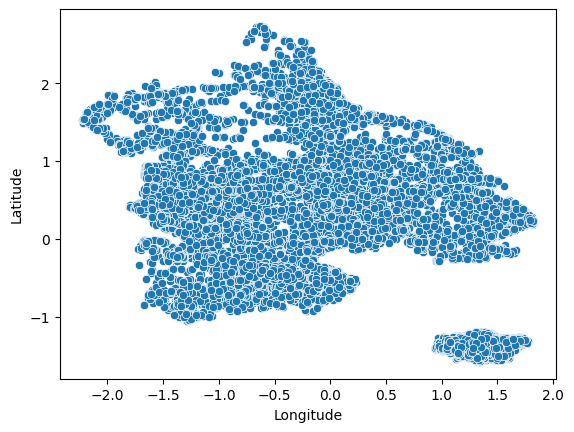

In [536]:
sns.scatterplot(data=df,x="Longitude",y="Latitude")

<Axes: >

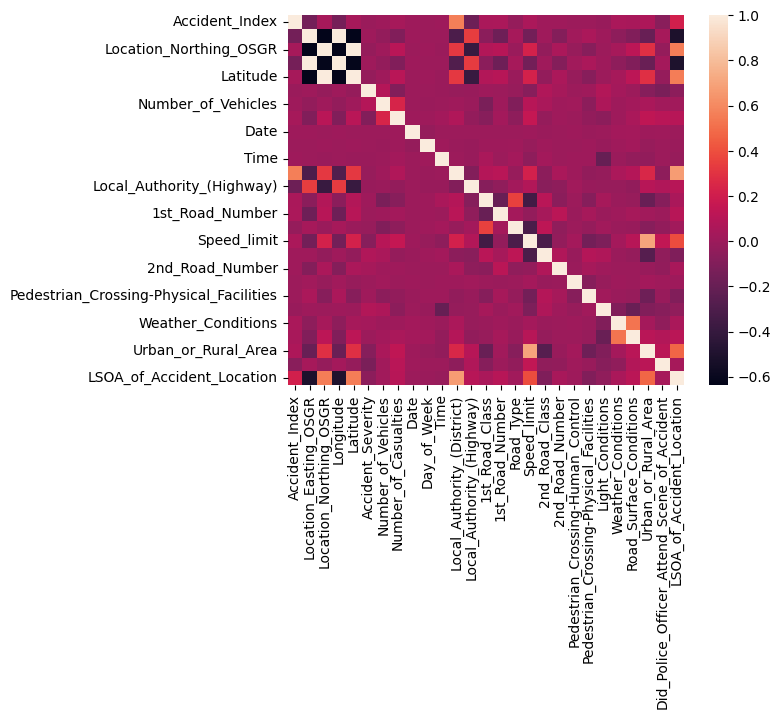

In [538]:
sns.heatmap(data=X.corr())

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [550]:
pca1=PCA(2)
x_pca=pca1.fit_transform(X)

In [545]:
km=KMeans(5)
km.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [579]:
km.predict(X)

array([0, 1, 2, ..., 0, 0, 1], dtype=int32)

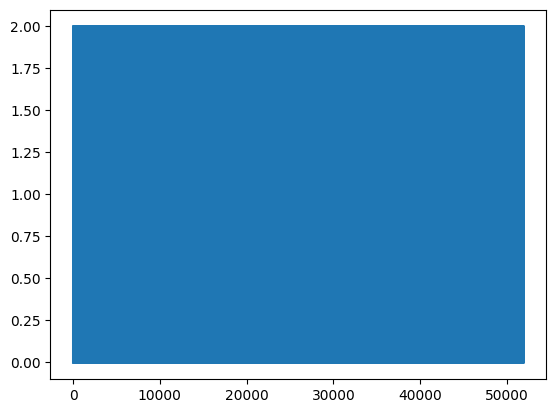

In [580]:
# no enough time to make the plot but from this loop you store the k value and the count
for k in range(1,6):
  km=KMeans(k)
  km.fit(X)


In [552]:
km1=KMeans(5)
km1.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [553]:
silhouette_score(x_pca,km1.labels_,random_state=42)

0.5744666369992464

<Axes: >

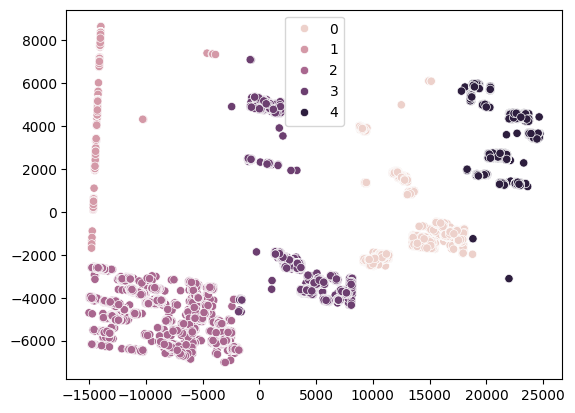

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [581]:
silhouette_score(X,km.labels_,random_state=42)

0.5345284140602369

## Plot the data points with their predicted cluster center

<Axes: >

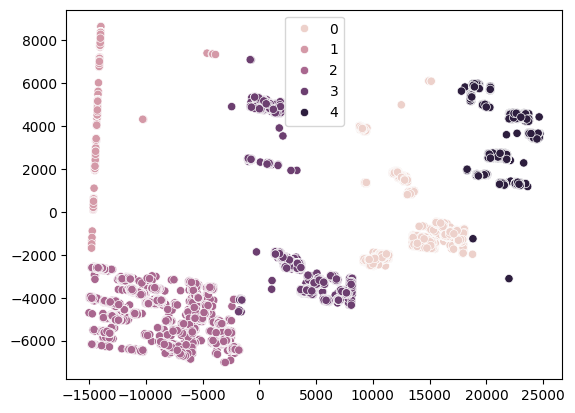

In [582]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],hue=km1.labels_)

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?